In [2]:
from __init__ import DATASET_PATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV


import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import validate_model_classification_smote, hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [3]:
dataset_file_path = DATASET_PATH
df = pd.read_csv(dataset_file_path)
df.sample(5)

,"PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro",IGF-1 ng/ml (N: 100-311),proBNP,"AMH (ng/ml) *7,14=pmol/l",weight,height (cm),BMI,systolic BP (ciśnienie skurczowe),diastolic BP (ciśnienie rozskurczowe),Hypertension,Waist Circumference (WC),WC>88,Hip Circumference (HC),WHR (Waist/Hip ratio),"WHR>0,85 (WHO)","WHR>0,8 (NIDDK)",WHTR (Waist/Height Ratio),"WHTR>0,5","overweight/obesity 0-normal/low, 1-overweight, 2-obesity","irregular cycles (0-nie, 1-tak)","ovulation (0-brak, 1-obecna)","PCO ovary morfology in USG (0-brak, 1--obecna)","stromal hypertrophy in ovary (0-brak, 1-obecny)",acne,hirsutism,FG score (Ferriman-Gallway score - stopień androgenizacji),hyperandrogenism,elevated DHT,hypothyroidism,Volume of the thyroid Right Lobe,Volume of the thyroid Left Lobe,thyroid volume,"nodules 0-lack, 1-RL, 2-LL, 3-both",chronic thyroiditis,Vole of the Right Ovary,Volume of the Left Ovary,ovaries volume - total,follicules >12,WBC x10^3/ul,neutrophil x10^3/ul,lymphocytes x10^3/ul,monocytes x10^3/ul,eosinocytes x10^3/ul,basophils x10^3/ul,% neutrophil,% lymphocytes,% monocytes,%eosinocytes,%basophils,RBC x10^6ul,Hemoglobin [g/dl],hematocrit [%],HTC/Hb,MCV fl,MCH pg,MCHC g/dl,RDW-CV %,PLT x10^3/ul,PDW fl,MPV fl,P-LCR %,PLT/WBC,MPV/PLT,PLR,limf/mono,NLR (stosunek neutrofili do limfocytów),L/WCC (leukocyty do całkowitej liczby krwinek białych),eos/leukocyty,sodium mmol/l,potassium mmol/l,calcium mg/dl,phosphorus mg/dl,creatinine mg/dl,CRP mg/l,ALT U/l,AST U/l,Bilirubin mg/dl,CHOL mmol/l,CHOL>200,HDL mmol/l,HDL<50,LDL mmol/l,LDL>135,TG mmol/l,Atherogenic index (AI) (LDL-C/HDL-C),coronary risk index (CRI) (TG/HDL-C),VAI - Visceral adiposity index,BAI - Body adiposity index,LAP INDEX - Lipid accumulation product index,TyG Index - Trigliceride-glucose index,AIP -Atherogenic index of plasma,UIBC ug/dl,ferrum ug/dl,TIBC,TSAT,ferritin ng/ml,glucose 0 mg/dl,glucose 120 mg/dl,insulin 0 uU/ml,Insulin 120 uU/ml,HOMA,Matsuda,"QUICKI (N<0,357)",TSH mIU/L,FT3 pmol/l,FT4 pmol/l,Anty-TPO IU/ml,Anty-TG IU/ml,FSH mlU/ml,LH,LH/FSH,prolactin,DHEA-S ug/dl,testosterone nmol/l,T (ng/ml),T/SHBG,E(pg/ml)/T(ng/ml)/,Parathormone pg/ml,cortisol nmol/l 8:00,cortisol nmol/l 18:00,Estradiol pg/ml,SHBG nmol/l,SHBG>110,FTI (free testosterone index),ACTH pg/ml,HbA1c %,vitamin 25-OH D ng/ml,Androstendione ng/ml,17-OH-progesterone ng/ml,Dihydrotestosterone pg/ml (N<368),Testosterone/DHT,T/A (testosterone/androstendione),age
510,1,107.0,11.52,2.820728,112.0,174.0,36.992998,144.0,76.0,1.0,113.0,1.0,120.0,0.941667,1.0,1.0,0.649425,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,13.0,1.0,1.0,1.0,5.200,4.845,10.045,0.0,0.0,12.37,6.20,18.57,1.0,8.95,5.89,2.24,0.60,0.14,0.08,65.8,25.0,6.7,1.6,0.9,4.74,13.6,40.7,2.992647,85.9,28.7,33.4,12.5,274.0,15.3,12.5,45.1,30.614525,0.045620,122.321429,3.733333,2.629464,0.250279,0.015642,144.0,4.53,9.36,3.73,0.78,6.8,13.0,17.0,0.33,5.32716,1.0,1.34472,0.0,3.529890,1.0,1.01610,2.625000,1.730769,1.504545,50.965517,55.88550,4.600145,0.238239,243.0,58.0,301.0,19.0,122.0,110.0,152.0,43.75,192.30,11.882716,0.84,0.271564,4.85,6.48,14.49,10.0,13.0,7.5,18.0,2.400000,292.0,338.0,1.50,0.432277,0.119048,67.086666,27.35,319.0,86.0,29.0,12.6,0.0,12.18,27.5,5.1,20.0,3.55,2.21,473.0,0.003171,0.422535,22.0
151,0,NaN,43.28,NaN,58.0,170.0,20.069204,NaN,NaN,NaN,72.0,0.0,82.0,0.878049,1.0,1.0,0.423529,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,2.639,2.352,4.991,0.0,0.0,NaN,NaN,NaN,NaN,9.13,5.28,2.93,0.56,0.29,0.07,57.8,32.1,6.1,3.2,0.8,4.26,12.4,36.6,2.951613,85.9,29.1,33.9,12.6,279.0,11.0,9.8,23.9,30.558598,0.035125,95.221843,5.232143,1.802048,0.320920,0.031763,NaN,NaN,NaN,NaN,0.80,2.6,NaN,NaN,NaN,4.47378,0.0,2.27568,0.0,1.582632,0.0,1.35480,0.695455,1.363636,1.079533,30.235294,18.96720,4.597105,0.134699,NaN,NaN,NaN,NaN,NaN,82.0,84.0,7.58,NaN,1.534716,NaN,0.357976,2.87,4.32,12.90,9.0,10.0,3.2,1.9,0.593750,NaN,137.0,1.40,0.403458,0.007000,NaN,NaN,NaN,NaN,NaN,200.0,1.0,NaN,NaN,NaN,NaN,3.15,2.36,NaN,NaN,0.444444,22.0
541,1,487.0,20.38,NaN,60.5,169.0,21.182732,101.0,61.

(999, 135)


<Axes: >

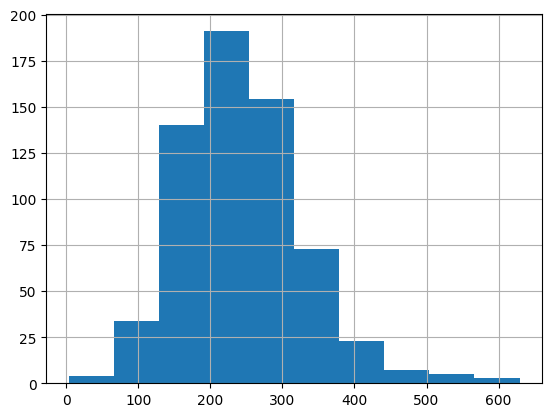

In [13]:
print(df.shape)
df[IGF].hist()

## Discretize IGF-1

In [14]:
# IGF_DISCRETE = 'IGF discretized 0-low, 1-normal, 2-high'
IGF_DISCRETE = 'IGF-1 0-normal, 1-high'
CLASS_NAMES = ['normal', 'high']

In [15]:
# IGF_DISCRETE = 'IGF discretized 0-low, 1-normal, 2-high'
IGF_DISCRETE = 'IGF-1 0-normal, 1-high'
CLASS_NAMES = ['normal', 'high']



def get_discrete_value_based_on_interval(value, lower_value, upper_value):
    if value < lower_value:
        return 0
    elif lower_value <= value <= upper_value:
        return 1
    elif value > upper_value:
        return 2


def discretize_IGF(row):
    age = row['age']
    igf = row[IGF]
    
    if age <= 2:
        return get_discrete_value_based_on_interval(igf, 15, 217)
    elif age <= 5:
        return get_discrete_value_based_on_interval(igf, 35, 184)
    elif age <= 8:
        return get_discrete_value_based_on_interval(igf, 45, 262)
    elif age <= 11:
        return get_discrete_value_based_on_interval(igf, 91, 611)
    elif age <= 14:
        return get_discrete_value_based_on_interval(igf, 102, 486)
    elif age <= 17:
        return get_discrete_value_based_on_interval(igf, 125, 624)
    elif age <= 20:
        return get_discrete_value_based_on_interval(igf, 39, 402)
    elif age <= 30:
        return get_discrete_value_based_on_interval(igf, 86, 338)
    elif age <= 40:
        return get_discrete_value_based_on_interval(igf, 75, 237)
    elif age <= 50:
        return get_discrete_value_based_on_interval(igf, 59, 210)
    elif age <= 60:
        return get_discrete_value_based_on_interval(igf, 31, 227)
    elif age > 60:
        return get_discrete_value_based_on_interval(igf, 53, 208)



df[IGF_DISCRETE] = df.apply(discretize_IGF, axis=1)

df.drop(IGF, axis=1, inplace=True)

df.head()


,"PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro",proBNP,"AMH (ng/ml) *7,14=pmol/l",weight,height (cm),BMI,systolic BP (ciśnienie skurczowe),diastolic BP (ciśnienie rozskurczowe),Hypertension,Waist Circumference (WC),WC>88,Hip Circumference (HC),WHR (Waist/Hip ratio),"WHR>0,85 (WHO)","WHR>0,8 (NIDDK)",WHTR (Waist/Height Ratio),"WHTR>0,5","overweight/obesity 0-normal/low, 1-overweight, 2-obesity","irregular cycles (0-nie, 1-tak)","ovulation (0-brak, 1-obecna)","PCO ovary morfology in USG (0-brak, 1--obecna)","stromal hypertrophy in ovary (0-brak, 1-obecny)",acne,hirsutism,FG score (Ferriman-Gallway score - stopień androgenizacji),hyperandrogenism,hypothyroidism,Volume of the thyroid Right Lobe,Volume of the thyroid Left Lobe,thyroid volume,"nodules 0-lack, 1-RL, 2-LL, 3-both",chronic thyroiditis,Vole of the Right Ovary,Volume of the Left Ovary,ovaries volume - total,follicules >12,WBC x10^3/ul,neutrophil x10^3/ul,lymphocytes x10^3/ul,monocytes x10^3/ul,eosinocytes x10^3/ul,basophils x10^3/ul,% neutrophil,% lymphocytes,% monocytes,%eosinocytes,%basophils,RBC x10^6ul,Hemoglobin [g/dl],hematocrit [%],HTC/Hb,MCV fl,MCH pg,MCHC g/dl,RDW-CV %,PLT x10^3/ul,PDW fl,MPV fl,P-LCR %,PLT/WBC,MPV/PLT,PLR,limf/mono,NLR (stosunek neutrofili do limfocytów),L/WCC (leukocyty do całkowitej liczby krwinek białych),eos/leukocyty,sodium mmol/l,potassium mmol/l,calcium mg/dl,phosphorus mg/dl,creatinine mg/dl,CRP mg/l,ALT U/l,AST U/l,Bilirubin mg/dl,CHOL mg/dl,CHOL mmol/l,CHOL>200,HDL mg/dl,HDL mmol/l,HDL<50,LDL mg/dl,LDL mmol/l,LDL>135,TG,TG mmol/l,Atherogenic index (AI) (LDL-C/HDL-C),coronary risk index (CRI) (TG/HDL-C),VAI - Visceral adiposity index,BAI - Body adiposity index,LAP INDEX - Lipid accumulation product index,TyG Index - Trigliceride-glucose index,AIP -Atherogenic index of plasma,UIBC ug/dl,ferrum ug/dl,TIBC,TSAT,ferritin ng/ml,glucose 0 mg/dl,glucose 120 mg/dl,insulin 0 uU/ml,Insulin 120 uU/ml,HOMA,Matsuda,"QUICKI (N<0,357)",TSH mIU/L,FT3 pmol/l,FT4 pmol/l,Anty-TPO IU/ml,Anty-TG IU/ml,FSH mlU/ml,LH,LH/FSH,prolactin,DHEA-S ug/dl,testosterone nmol/l,T (ng/ml),T/SHBG,E(pg/ml)/T(ng/ml)/,Parathormone pg/ml,cortisol nmol/l 8:00,cortisol nmol/l 18:00,Estradiol pg/ml,SHBG nmol/l,FTI (free testosterone index),ACTH pg/ml,HbA1c %,vitamin 25-OH D ng/ml,Androstendione ng/ml,17-OH-progesterone ng/ml,Dihydrotestosterone pg/ml (N<368),Testosterone/DHT,T/A (testosterone/androstendione),age,"IGF-1 0-normal, 1-high"
0,0,41.82,NaN,51.5,164.5,19.031605,105.0,67.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,NaN,1.0,1.0,5.0,NaN,1.0,4.203225,3.057936,7.261161,NaN,NaN,9.090000,9.587292,18.677292,1.0,5.14,2.54,1.90,0.44,0.18,0.06,49.3,37.4,8.6,3.5,1.2,4.09,12.1,34.0,2.809917,83.1,29.6,35.6,12.1,234.0,10.5,9.7,22.8,45.525292,0.041453,123.157895,4.318182,1.336842,0.369650,0.035019,144.0,3.91,9.80,3.76,0.76,0.8,23.0,23.0,0.23,156.0,4.03416,0.0,66.0,1.70676,0.0,81.0,2.094660,0.0,52.0,0.58708,1.227273,0.787879,NaN,NaN,NaN,4.208576,-0.103541,247.0,40.0,287.0,14.0,38.0,87.0,78.0,8.54,23.89,1.834519,10.03,0.348313,4.04,4.59,15.69,14.0,10.0,10.02,13.2,1.317365,299.0,14.0,0.1,0.028818,0.000745,2567.799983,17.70,373.0,231.0,74.0,134.2,NaN,256.10,5.0,31.0,1.26,1.03,30.0,NaN,0.079365,NaN,NaN
1,0,265.00,NaN,57.0,167.0,20.438166,104.0,58.0,0.0,71.0,0.0,91.0,0.780220,0.0,0.0,0.425150,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.515000,3.633500,8.148500,0.0,0.0,3.313600,5.122300,8.435900,0.0,10.86,6.26,3.83,0.52,0.18,0.07,57.6,35.3,4.8,1.7,0.6,3.97,12.9,35.9,2.782946,90.4,32.5,35.9,12.1,284.0,12.3,10.6,29.6,26.151013,0.037324,74.151436,7.365385,1.634465,0.352670,0.016575,140.0,3.31,9.14,3.51,0.93,0.3,7.0,11.0,0.68,146.0,3.77556,0.0,77.0,1.99122,0.0,47.2,1.220592,0.0,110.0,1.24190,0.612987,1.428571,1.104891,36.491018,16.14470,4.528595,0.154902,147.0,129.0,276.0,47.0,70.0,78.0,105.0,5.77,56.19,1.111259,8.85,0.376893,3.73,5.18,15.83,11.0,10.0,4.50,6.2,1.377778,443.0,7.0,0.1,0.028818,0.000500,173.499999,23.12,65.0,733.0,5.0,200.0,NaN,86.26,4.8,21.0,2.32,20.00,97.0,

<Axes: >

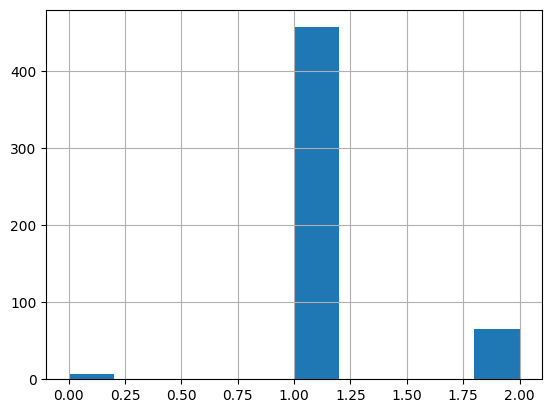

In [16]:
df[IGF_DISCRETE].hist()

In [17]:
#  we remove the class 0, because there're only 7 instances
df.loc[df[IGF_DISCRETE] == 0, IGF_DISCRETE] = np.nan


df[IGF_DISCRETE] = np.where(df[IGF_DISCRETE] == 1, 0, df[IGF_DISCRETE])

df[IGF_DISCRETE] = np.where(df[IGF_DISCRETE] == 2, 1, df[IGF_DISCRETE])


<Axes: >

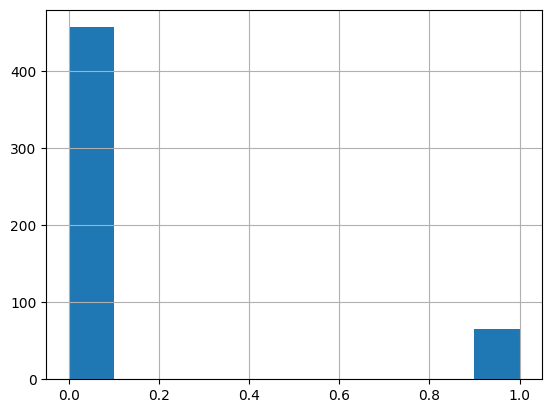

In [18]:
df[IGF_DISCRETE].hist()

# Model selection for VIT D

In [19]:
df_cleaned = df.dropna(subset=[IGF_DISCRETE])

X, y = df_cleaned.drop(columns=[IGF_DISCRETE]), df_cleaned[IGF_DISCRETE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Best preprocessing

In [20]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(IGF_DISCRETE))
    ])

### For smote

In [21]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

## Hyperparameter tuning

### Decision Tree

In [68]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5, 6, 7],
    'model__min_samples_split': [7, 8, 9],
    'model__min_samples_leaf': [7, 8, 9],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, IGF_DISCRETE, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 45 candidates, totalling 675 fits
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 7, 'model__min_samples_leaf': 9, 'model__min_samples_split': 8}
Best score (f1_weighted): 0.6651882183651412


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


,params,mean_train_score,mean_test_score
43,"{'model__criterion': 'gini', 'model__max_depth': 7, 'model__min_samples_leaf': 9, 'model__min_samples_split': 8}",0.845979,0.665188
26,"{'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 9, 'model__min_samples_split': 9}",0.798193,0.663116
22,"{'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 8, 'model__min_samples_split': 8}",0.801743,0.663009
35,"{'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 9, 'model__min_samples_split': 9}",0.827743,0.662592
17,"{'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 9, 'model__min_samples_split': 9}",0.763086,0.662093
7,"{'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 9, 'model__min_samples_split': 8}",0.726177,0.661726
15,"{'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 9, 'model__min_samples_split': 7}",0.762995,0.661651
34,"{'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 9, 'model__min_samples_split': 8}",0.828254,0.661371
14,"{'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 8, 'model__min_samples_split': 9}",0.764113,0.661348
33,"{'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 9, 'model__min_samples_split': 7}",0.827731,0.661088


In [62]:
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

# tuned_df = compare_random_states(X_train, y_train, model, IGF_DISCRETE, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits


Best parameters: {'model__C': 5}
Best score (f1_weighted): 0.7084732545965751


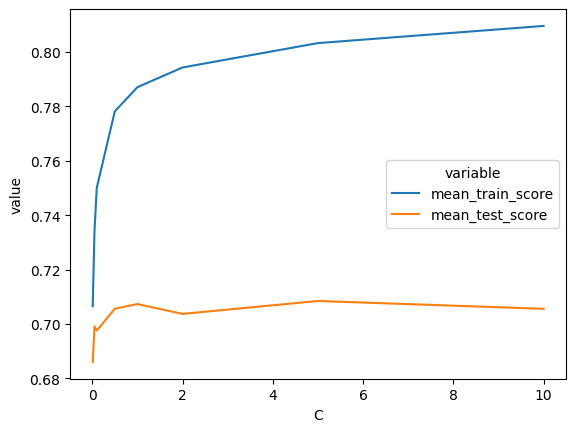

,C,mean_train_score,mean_test_score
0,0.01,0.706560,0.686063
1,0.05,0.734262,0.699125
2,0.1,0.750084,0.697578
3,0.5,0.778211,0.705629
4,1,0.787092,0.707339
5,2,0.794347,0.703731
6,5,0.803311,0.708473
7,10,0.809625,0.705598


In [63]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, IGF_DISCRETE, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.5

### Random Forest

In [64]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, IGF_DISCRETE, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}
Best score (f1_weighted): 0.7804574460648894


,params,mean_train_score,mean_test_score
0,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.988859,0.780457
7,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.971726,0.779972
5,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.979926,0.778635
1,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.989491,0.778150
3,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.981188,0.777899
8,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.970992,0.777002
2,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.988546,0.775993
6,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.971203,0.775608
4,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.980033,0.773047


In [65]:
# model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

# tuned_df = compare_random_states(X_train, y_train, model, IGF_DISCRETE, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

### SVM

In [66]:
# model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

# param_grid_svc = {
#     'model__kernel': ['linear', 'rbf', 'sigmoid'],
#     'model__C': [0.1, 1, 10, 100],
#     'model__gamma': [0.1, 1, 10],
#     'model__epsilon': [0.1, 0.2, 0.3],
# }

# svc_h_scores = hyperparameter_tuning_general(X_train, y_train, IGF_DISCRETE, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
# svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

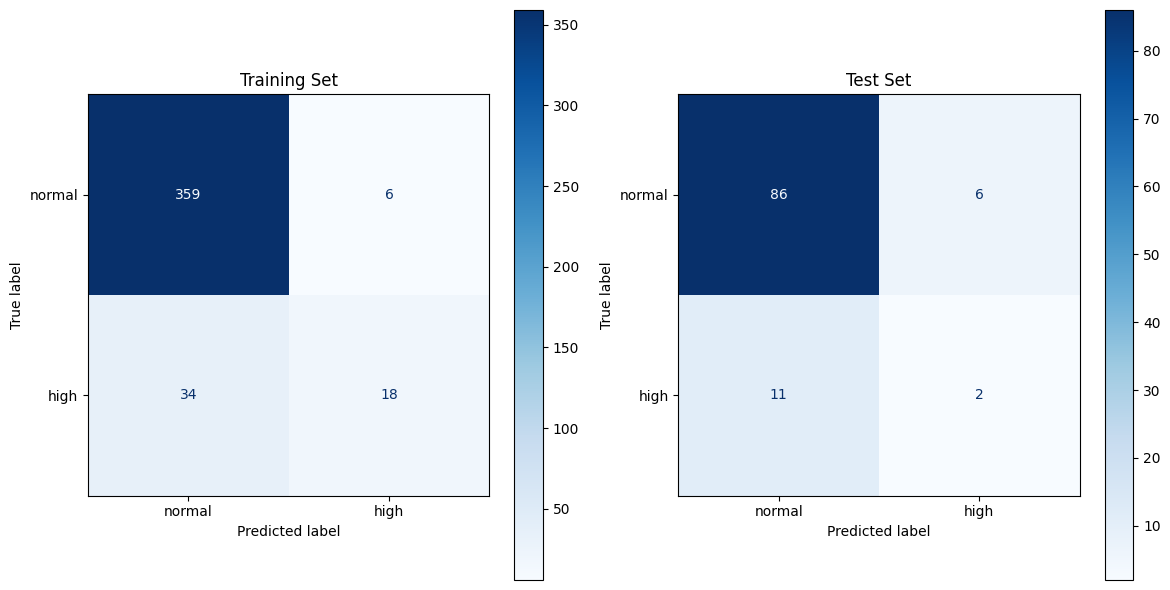

Training set
              precision    recall  f1-score   support

      normal       0.91      0.98      0.95       365
        high       0.75      0.35      0.47        52

    accuracy                           0.90       417
   macro avg       0.83      0.66      0.71       417
weighted avg       0.89      0.90      0.89       417

Test set
              precision    recall  f1-score   support

      normal       0.89      0.93      0.91        92
        high       0.25      0.15      0.19        13

    accuracy                           0.84       105
   macro avg       0.57      0.54      0.55       105
weighted avg       0.81      0.84      0.82       105



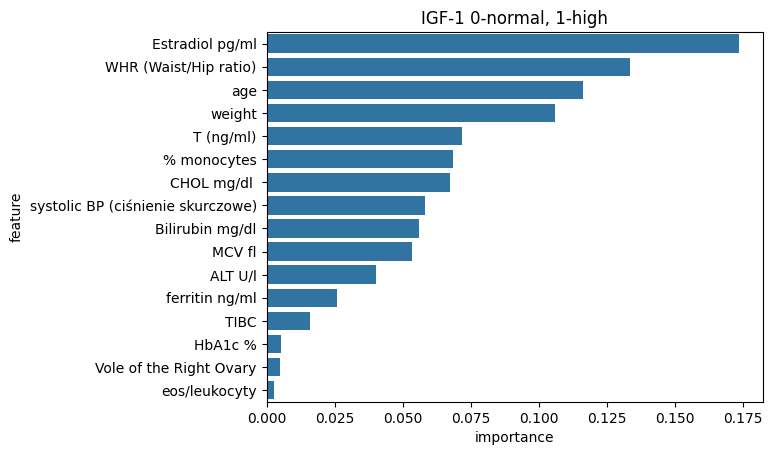

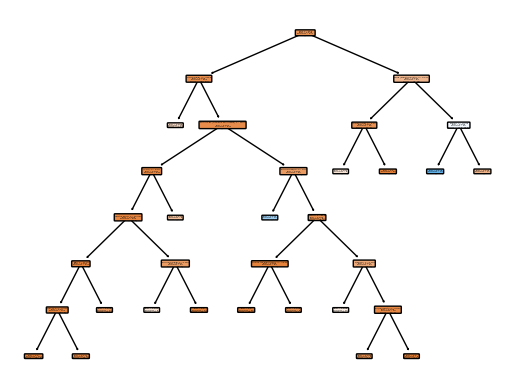

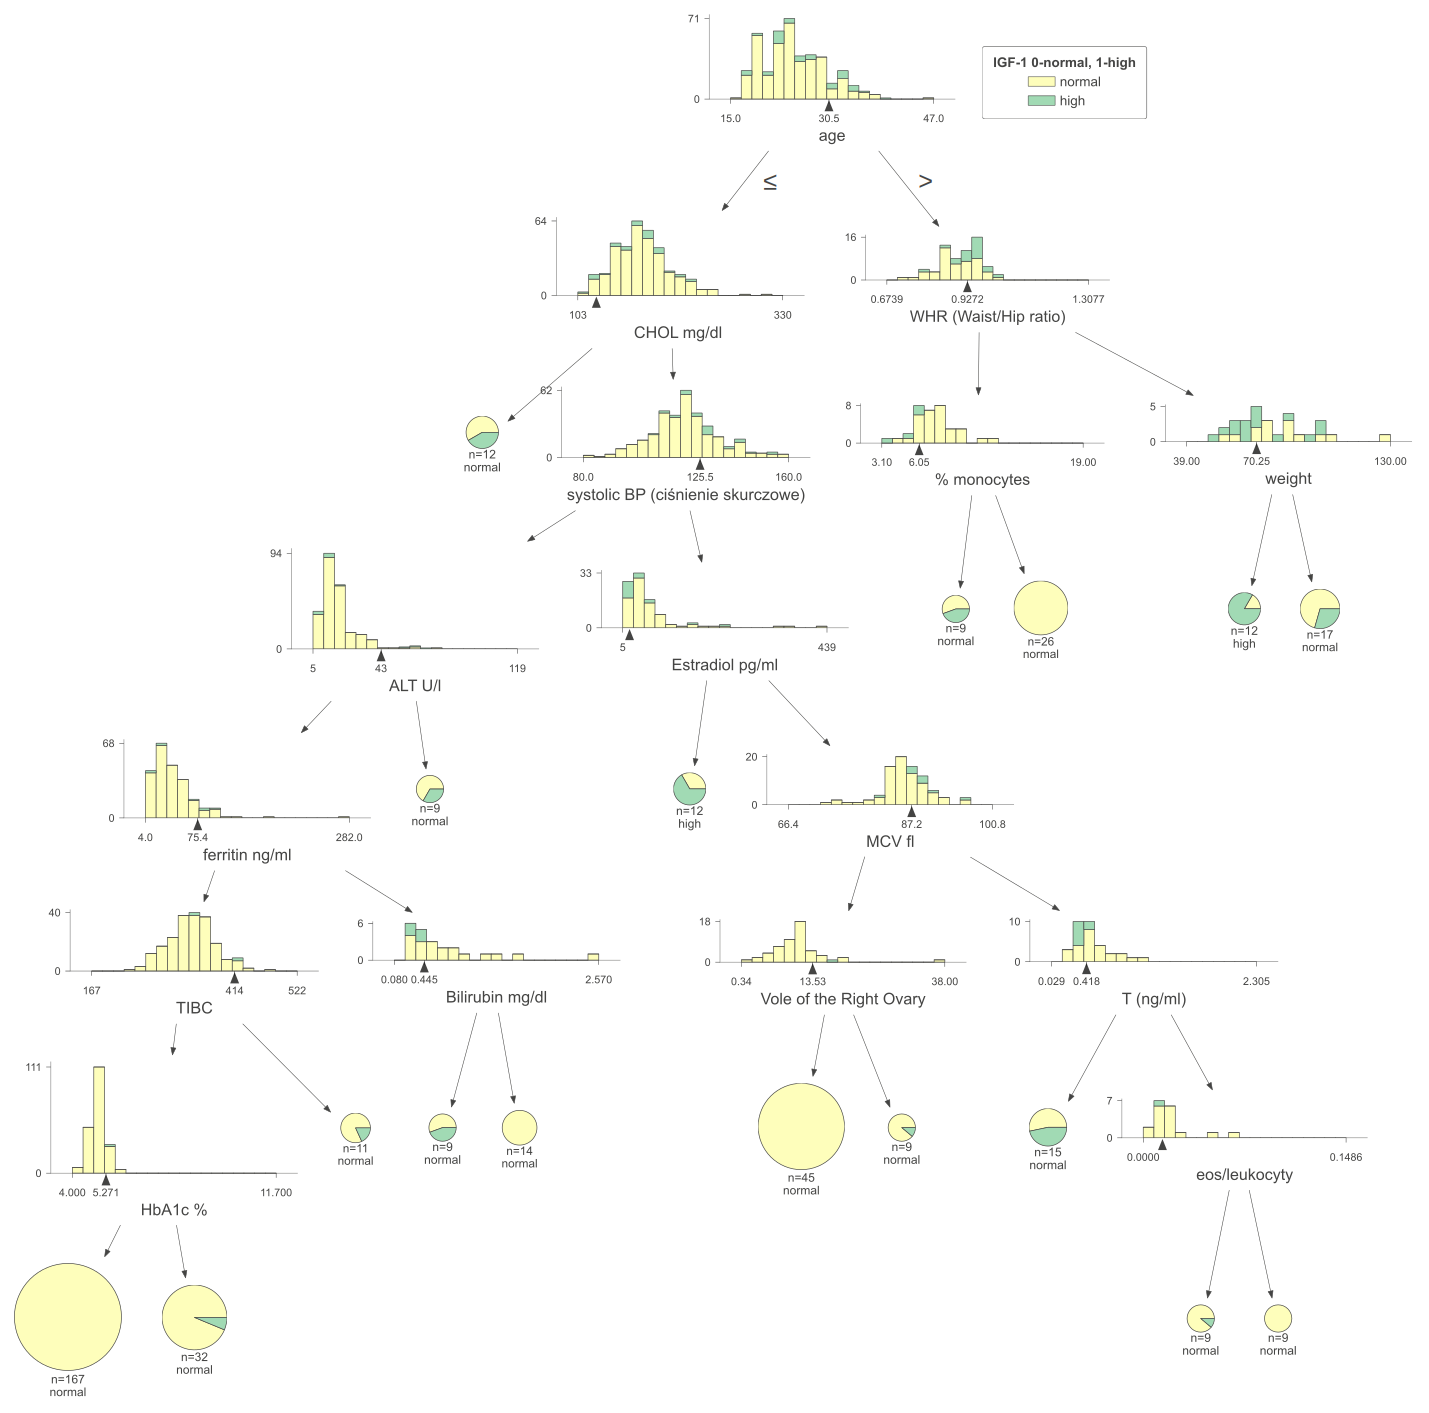

In [22]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=9, min_samples_split=8)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, IGF_DISCRETE, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, IGF_DISCRETE, CLASS_NAMES)

### RandomForest

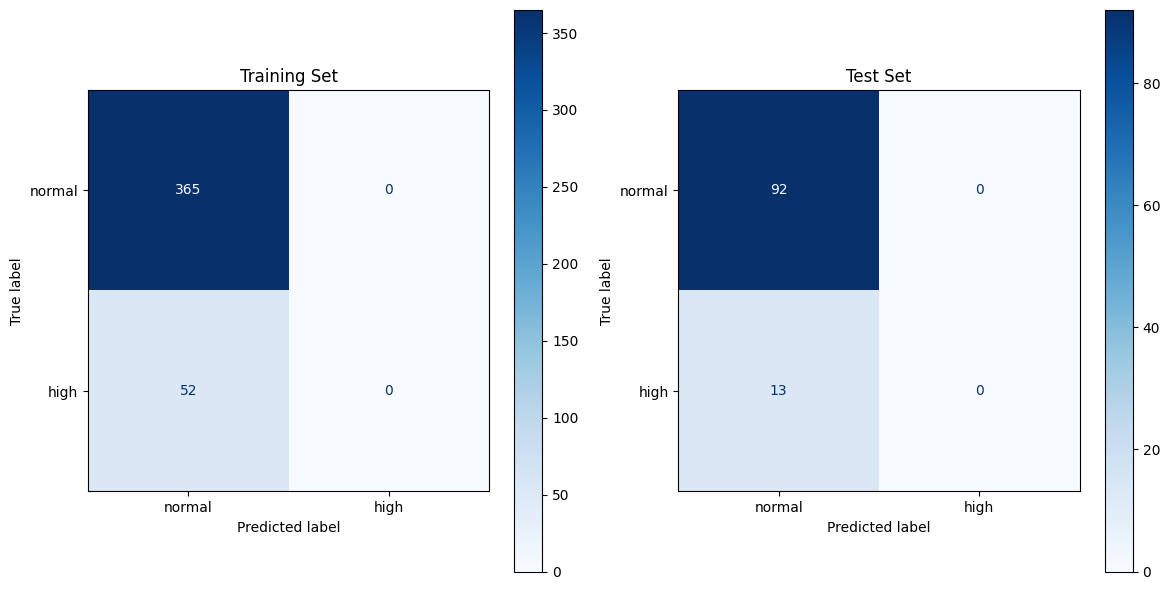

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and be

Training set
              precision    recall  f1-score   support

      normal       0.88      1.00      0.93       365
        high       0.00      0.00      0.00        52

    accuracy                           0.88       417
   macro avg       0.44      0.50      0.47       417
weighted avg       0.77      0.88      0.82       417

Test set
              precision    recall  f1-score   support

      normal       0.88      1.00      0.93        92
        high       0.00      0.00      0.00        13

    accuracy                           0.88       105
   macro avg       0.44      0.50      0.47       105
weighted avg       0.77      0.88      0.82       105



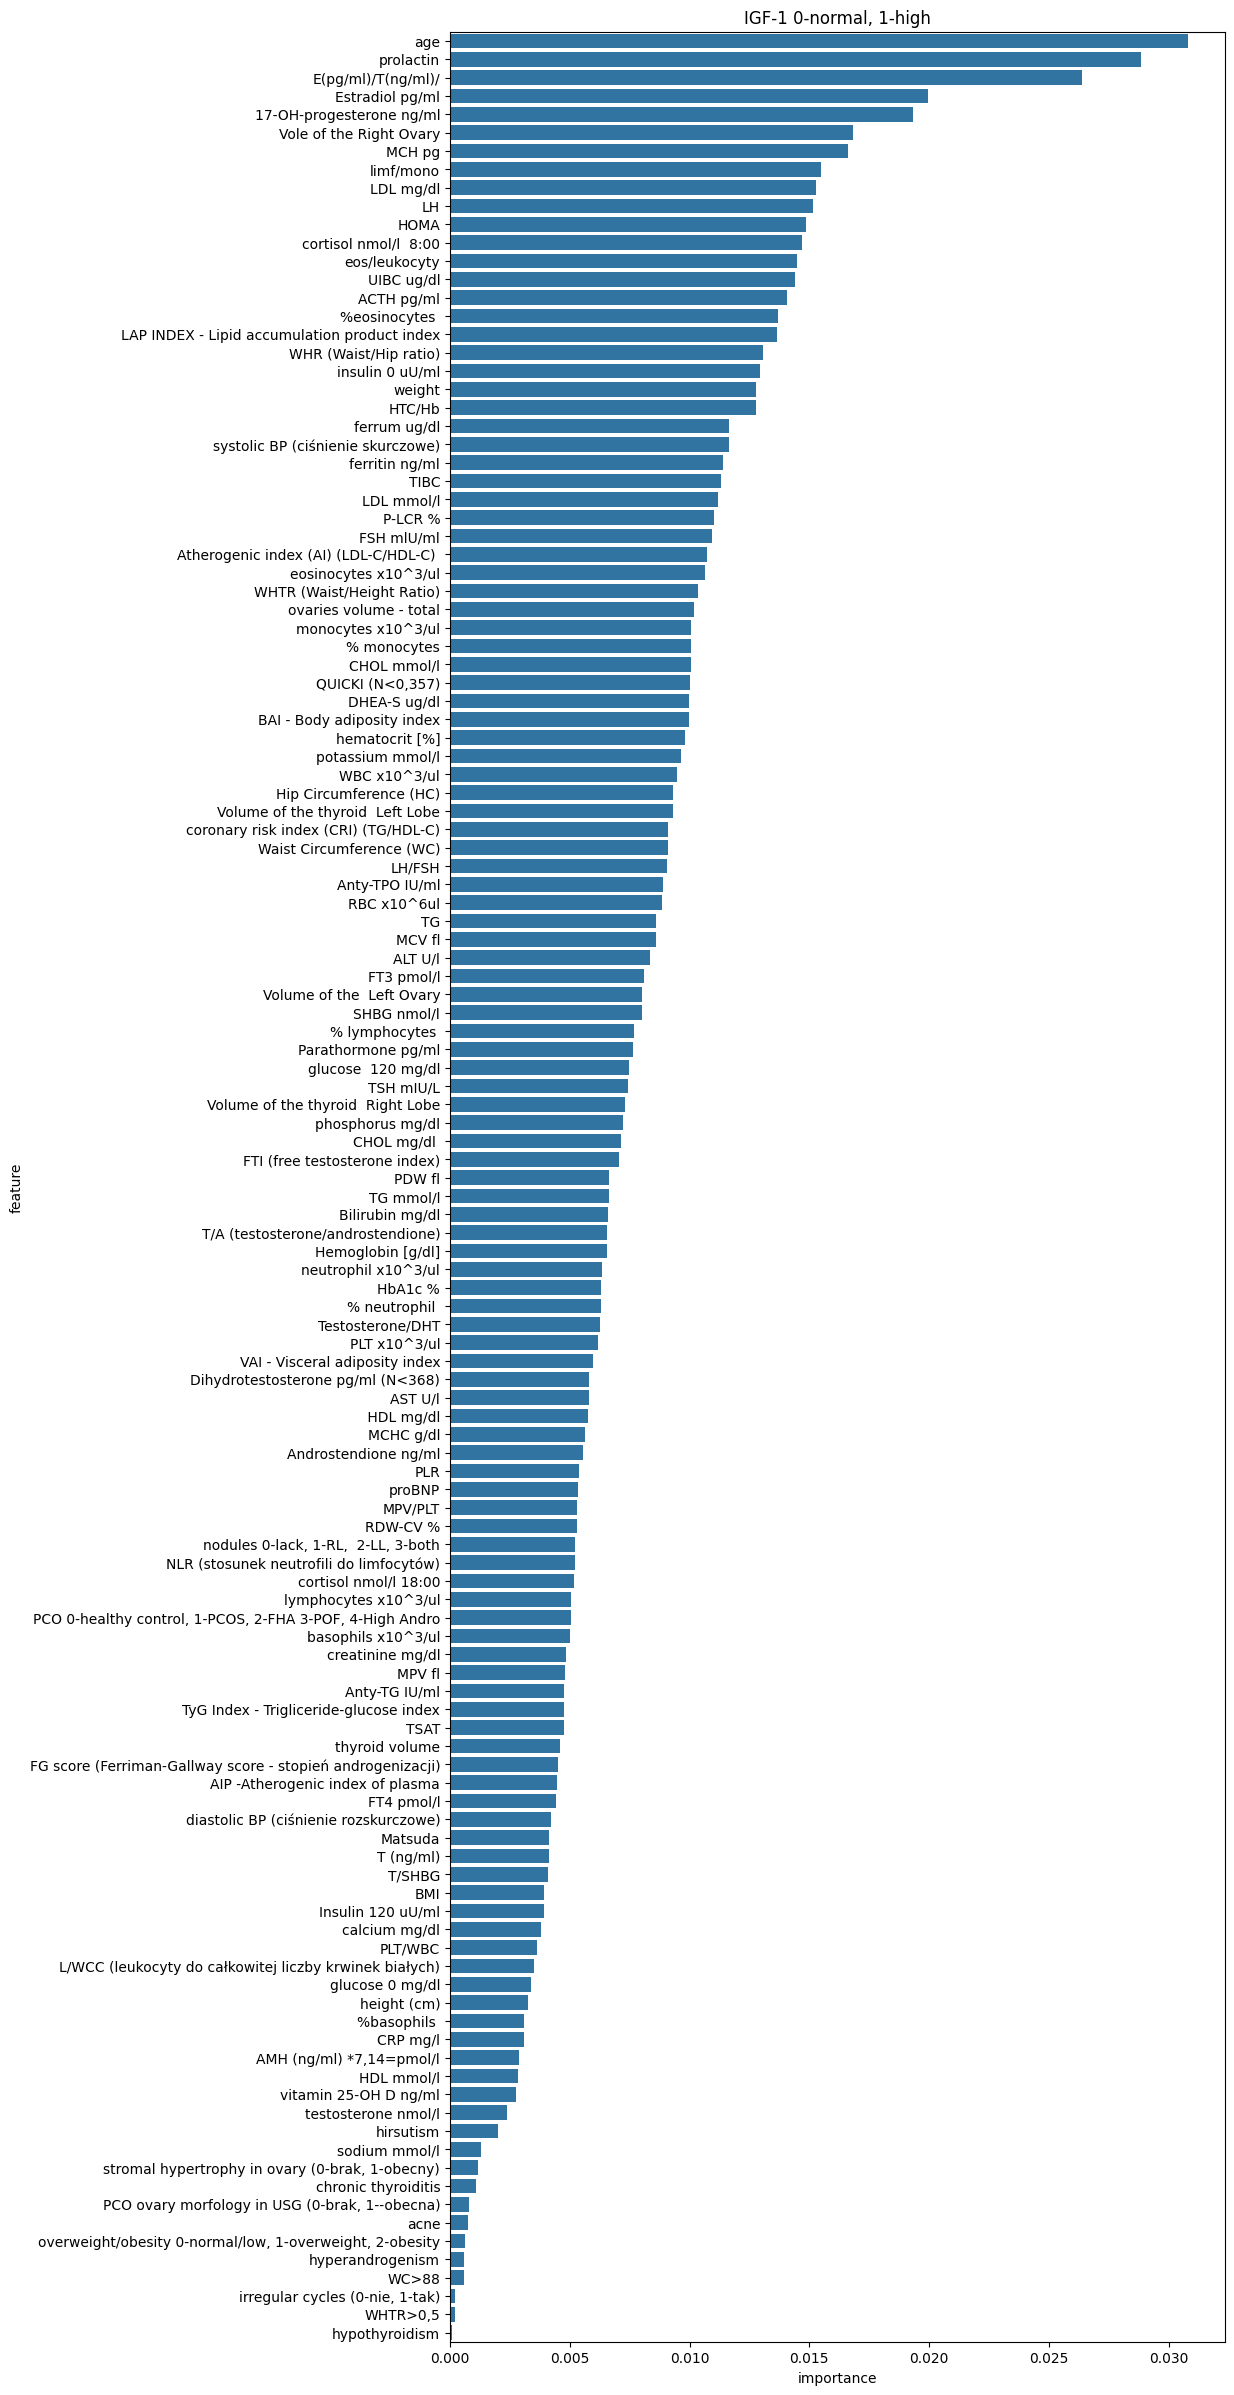

In [23]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=4, random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, IGF_DISCRETE, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

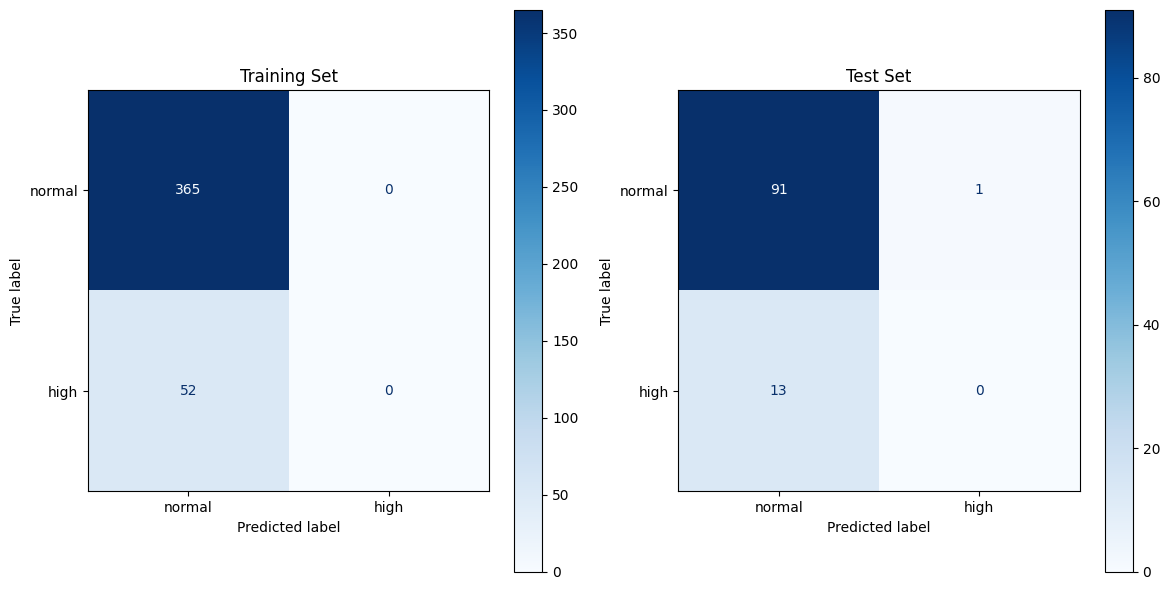

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Training set
              precision    recall  f1-score   support

      normal       0.88      1.00      0.93       365
        high       0.00      0.00      0.00        52

    accuracy                           0.88       417
   macro avg       0.44      0.50      0.47       417
weighted avg       0.77      0.88      0.82       417

Test set
              precision    recall  f1-score   support

      normal       0.88      0.99      0.93        92
        high       0.00      0.00      0.00        13

    accuracy                           0.87       105
   macro avg       0.44      0.49      0.46       105
weighted avg       0.77      0.87      0.81       105



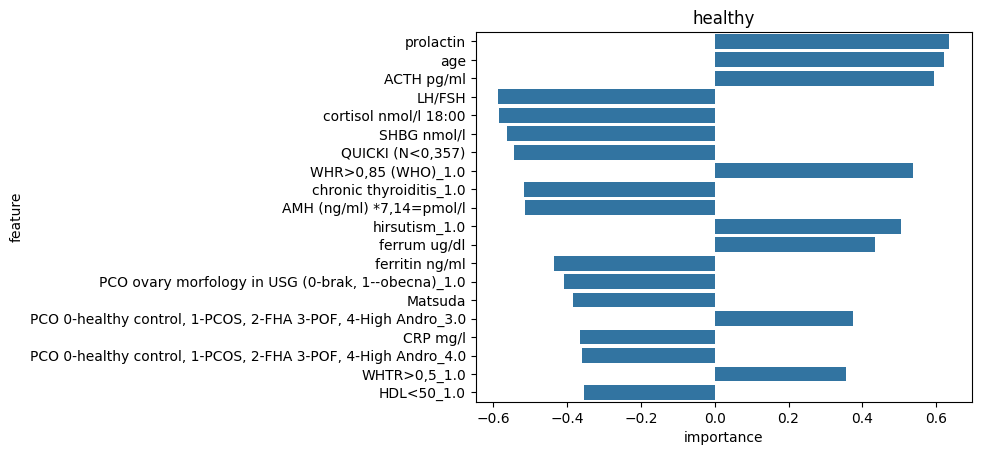

In [24]:
model_lr = LogisticRegression(C=0.5, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, IGF_DISCRETE, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [17]:
selected_features_map = {}

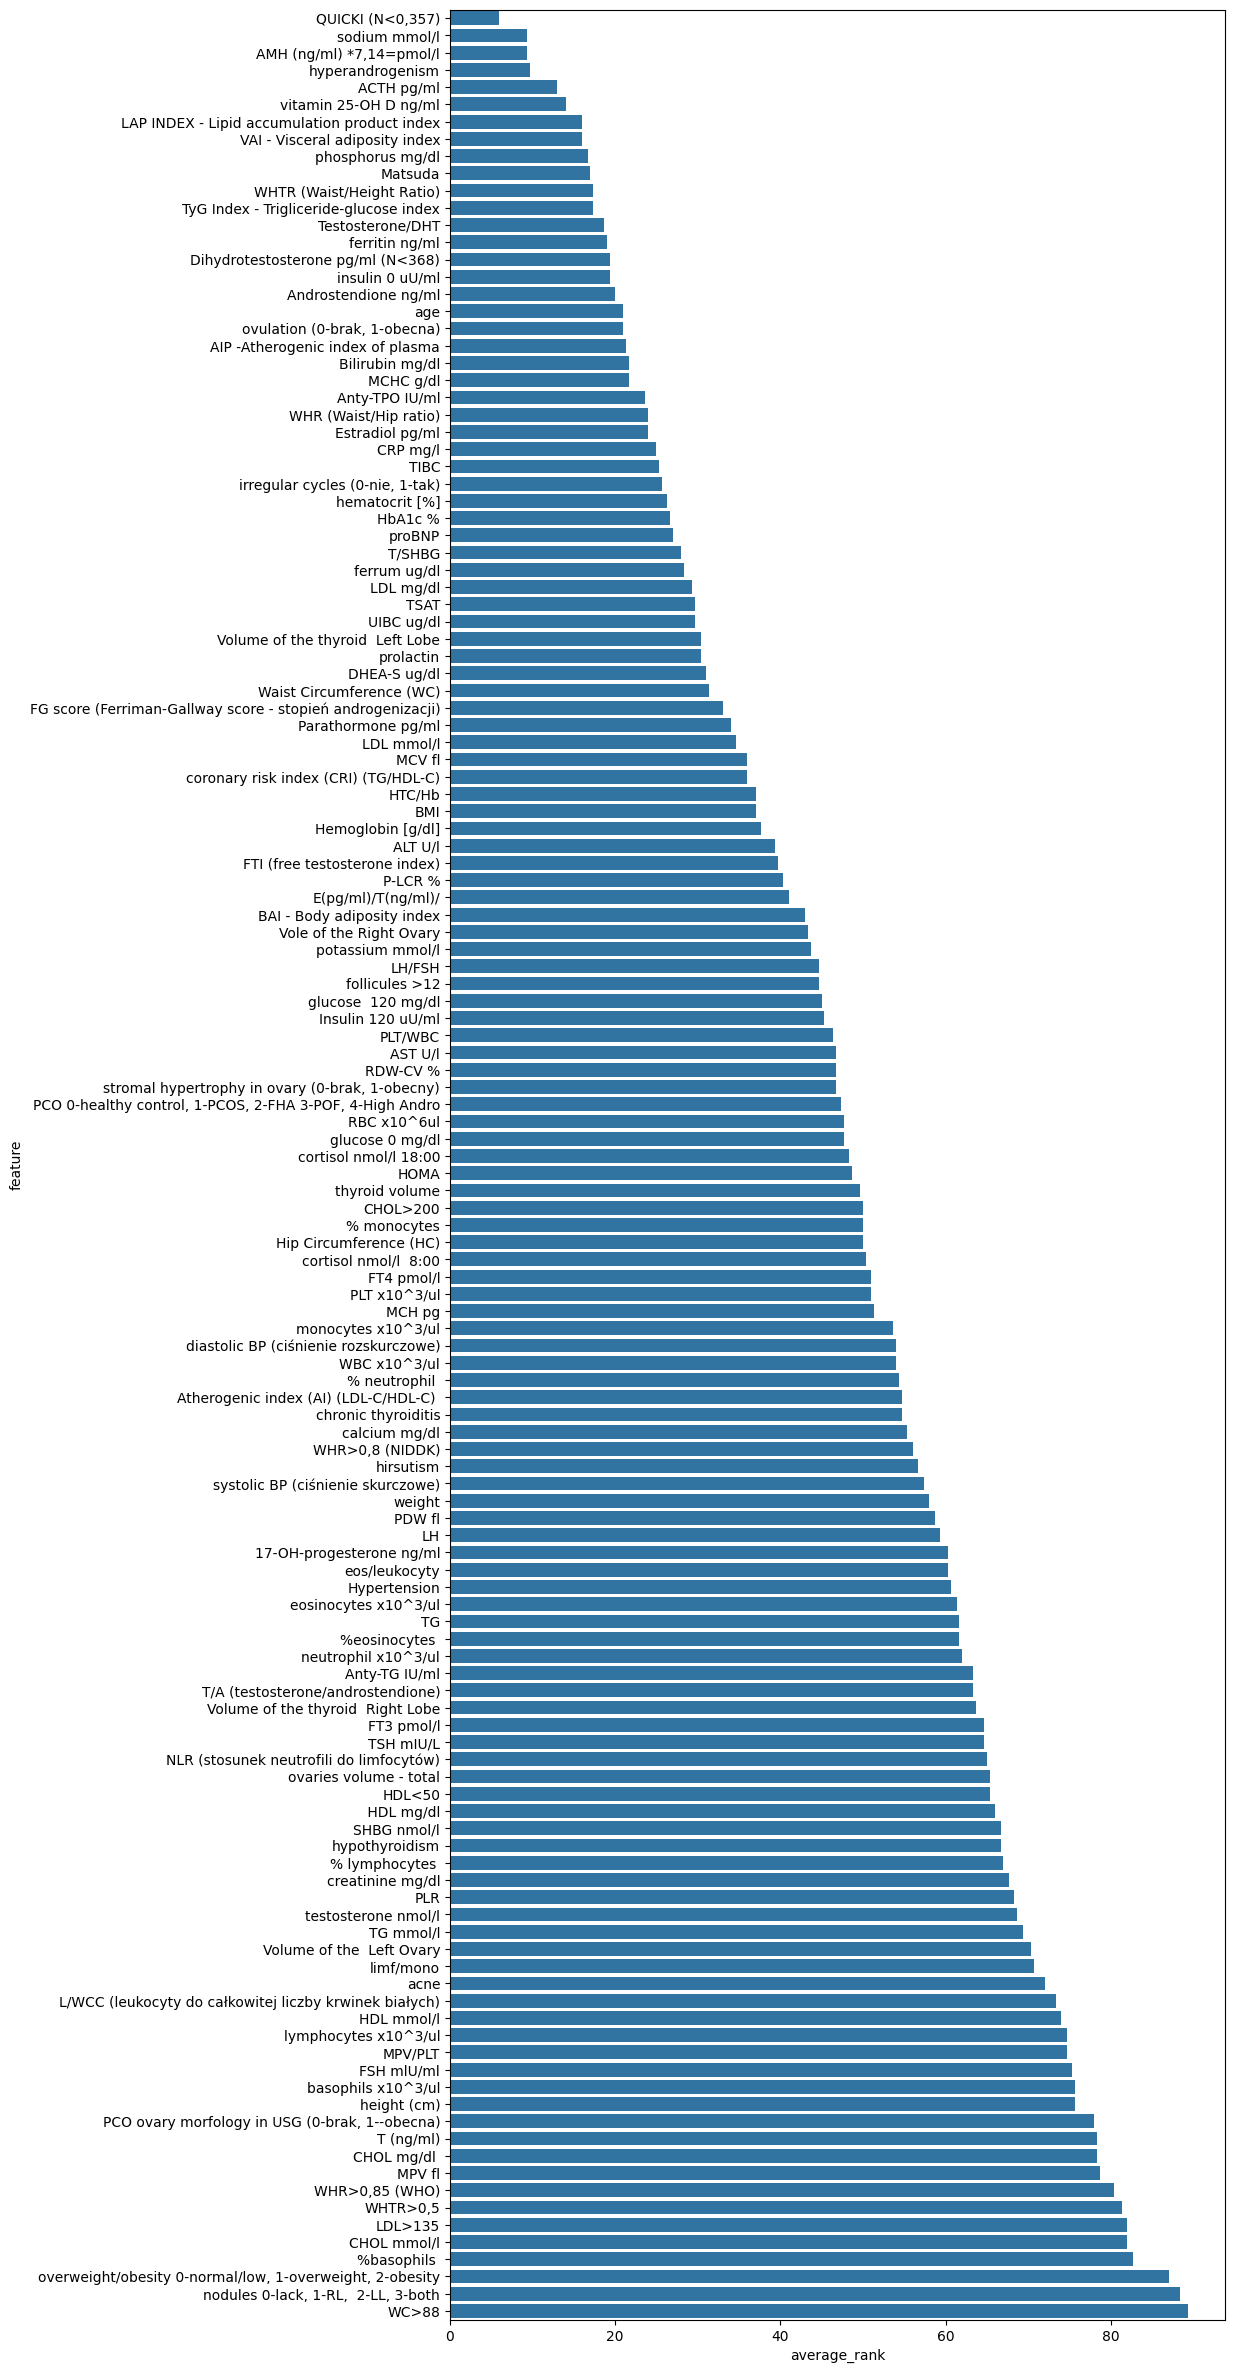

In [18]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [19]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 50 features:


['QUICKI (N<0,357)',
 'sodium mmol/l',
 'AMH (ng/ml) *7,14=pmol/l',
 'hyperandrogenism',
 'ACTH pg/ml',
 'vitamin 25-OH D ng/ml',
 'LAP INDEX - Lipid accumulation product index',
 'VAI - Visceral adiposity index',
 'phosphorus mg/dl',
 'Matsuda',
 'WHTR (Waist/Height Ratio)',
 'TyG Index - Trigliceride-glucose index',
 'Testosterone/DHT',
 'ferritin ng/ml',
 'Dihydrotestosterone pg/ml (N<368)',
 'insulin 0 uU/ml',
 'Androstendione ng/ml',
 'age',
 'ovulation (0-brak, 1-obecna)',
 'AIP -Atherogenic index of plasma',
 'Bilirubin mg/dl',
 'MCHC g/dl',
 'Anty-TPO IU/ml',
 'WHR (Waist/Hip ratio)',
 'Estradiol pg/ml',
 'CRP mg/l',
 'TIBC',
 'irregular cycles (0-nie, 1-tak)',
 'hematocrit [%]',
 'HbA1c %',
 'proBNP',
 'T/SHBG',
 'ferrum ug/dl',
 'LDL mg/dl',
 'TSAT',
 'UIBC ug/dl',
 'Volume of the thyroid  Left Lobe',
 'prolactin',
 'DHEA-S ug/dl',
 'Waist Circumference (WC)',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'Parathormone pg/ml',
 'LDL mmol/l',
 'MCV fl',
 'cor

## Feature selection

### Chi 2

Selected 6 features


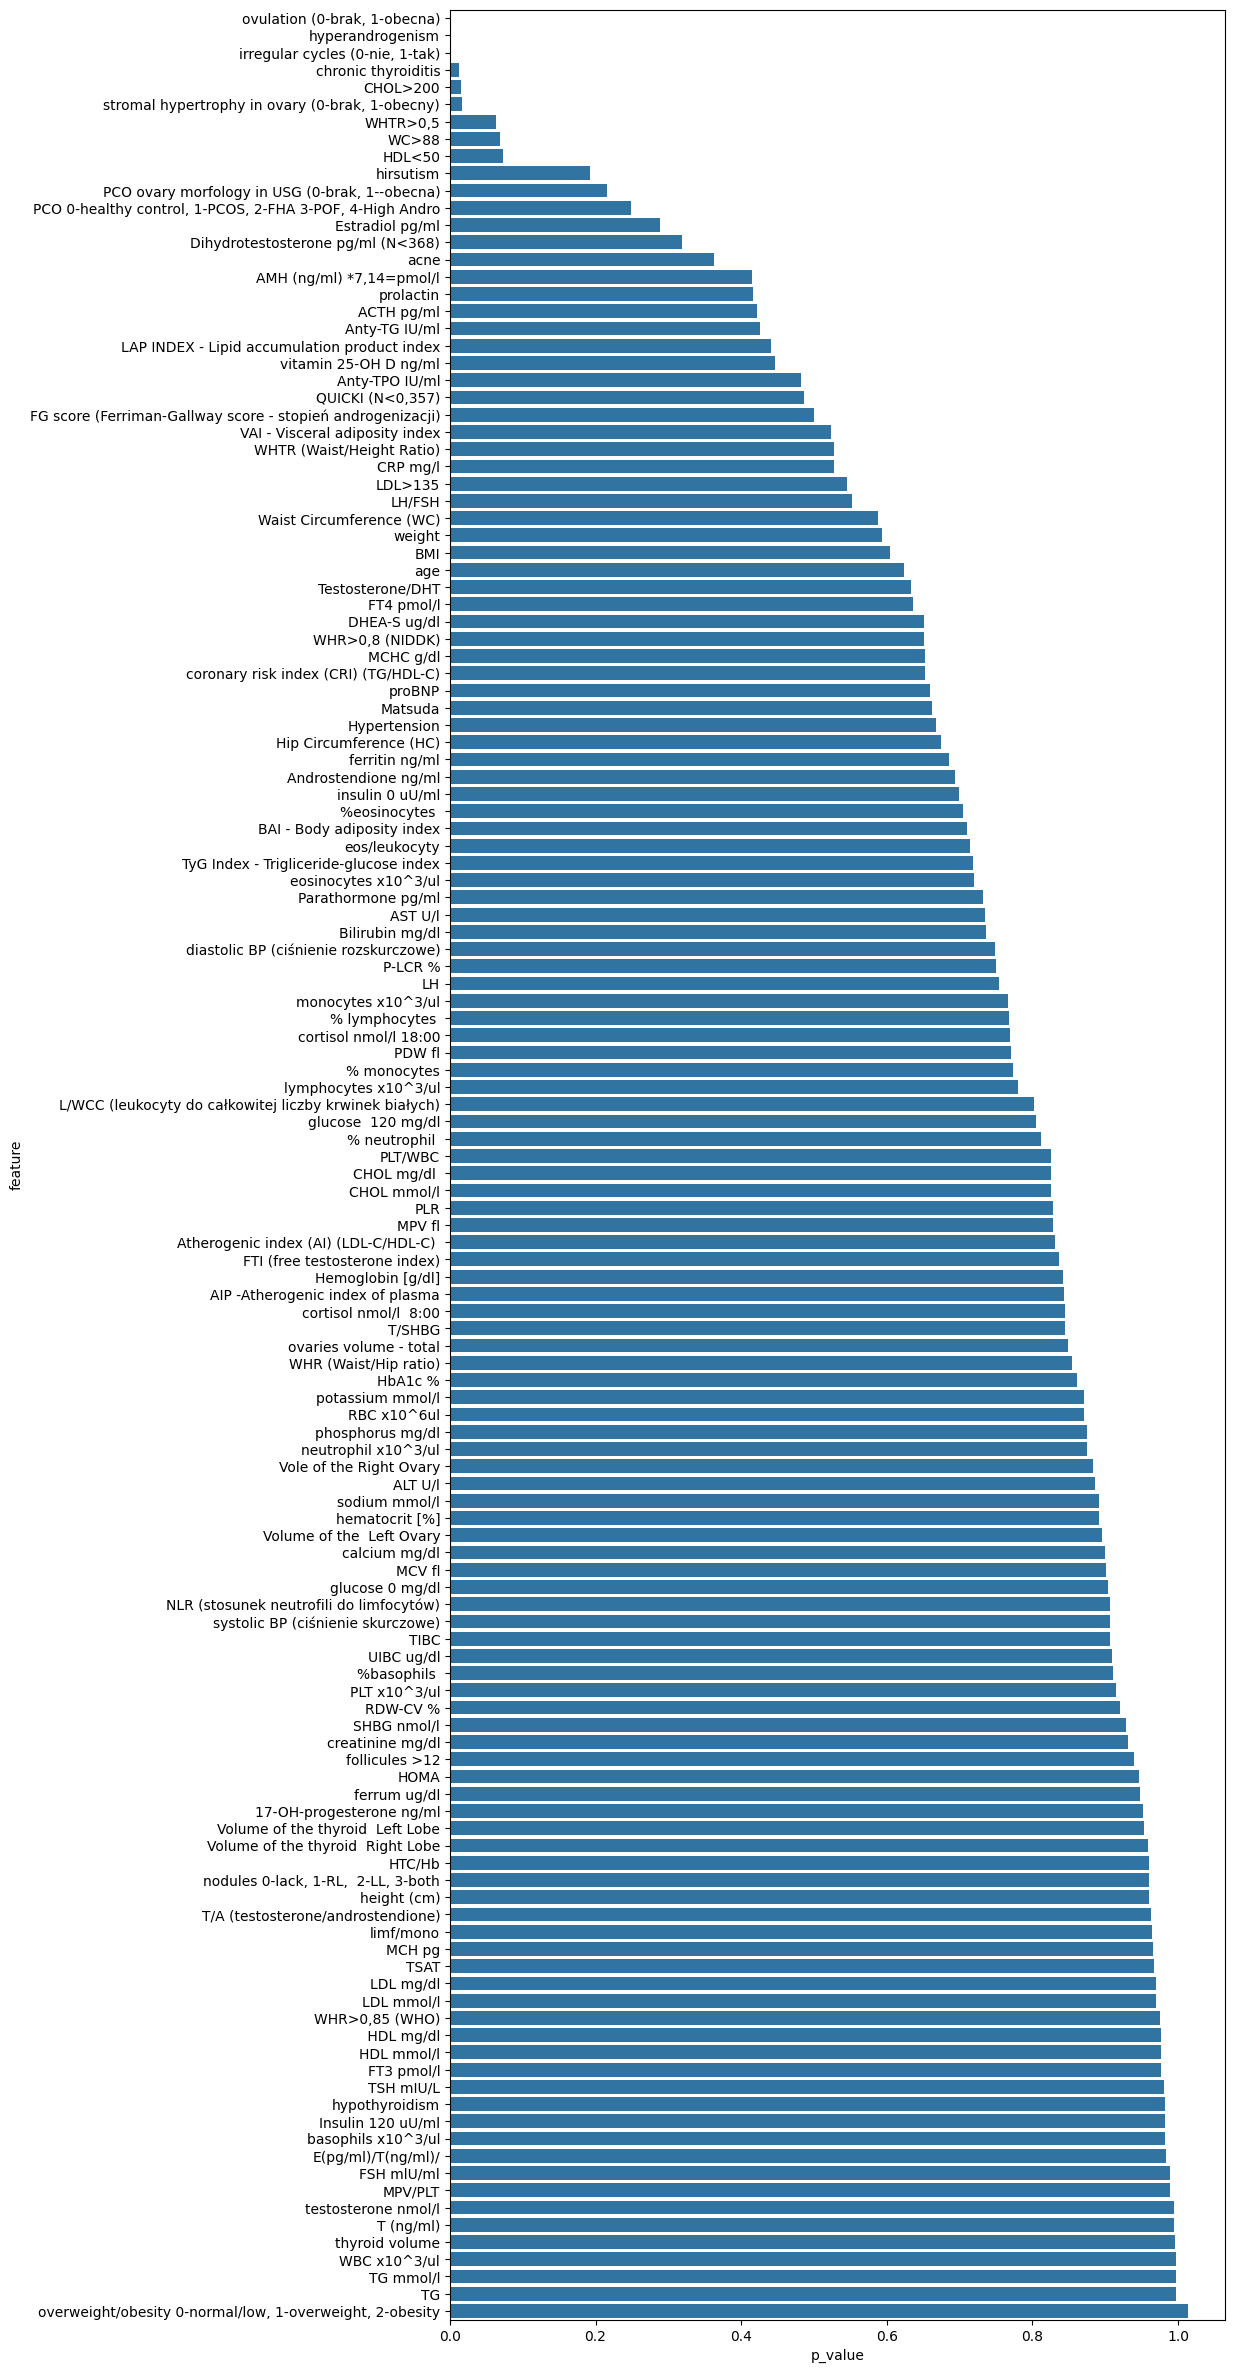

['ovulation (0-brak, 1-obecna)',
 'hyperandrogenism',
 'irregular cycles (0-nie, 1-tak)',
 'chronic thyroiditis',
 'CHOL>200',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)']

In [20]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), IGF_DISCRETE, continuous_preprocessor, categorical_preprocessor, X_train, y_train)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

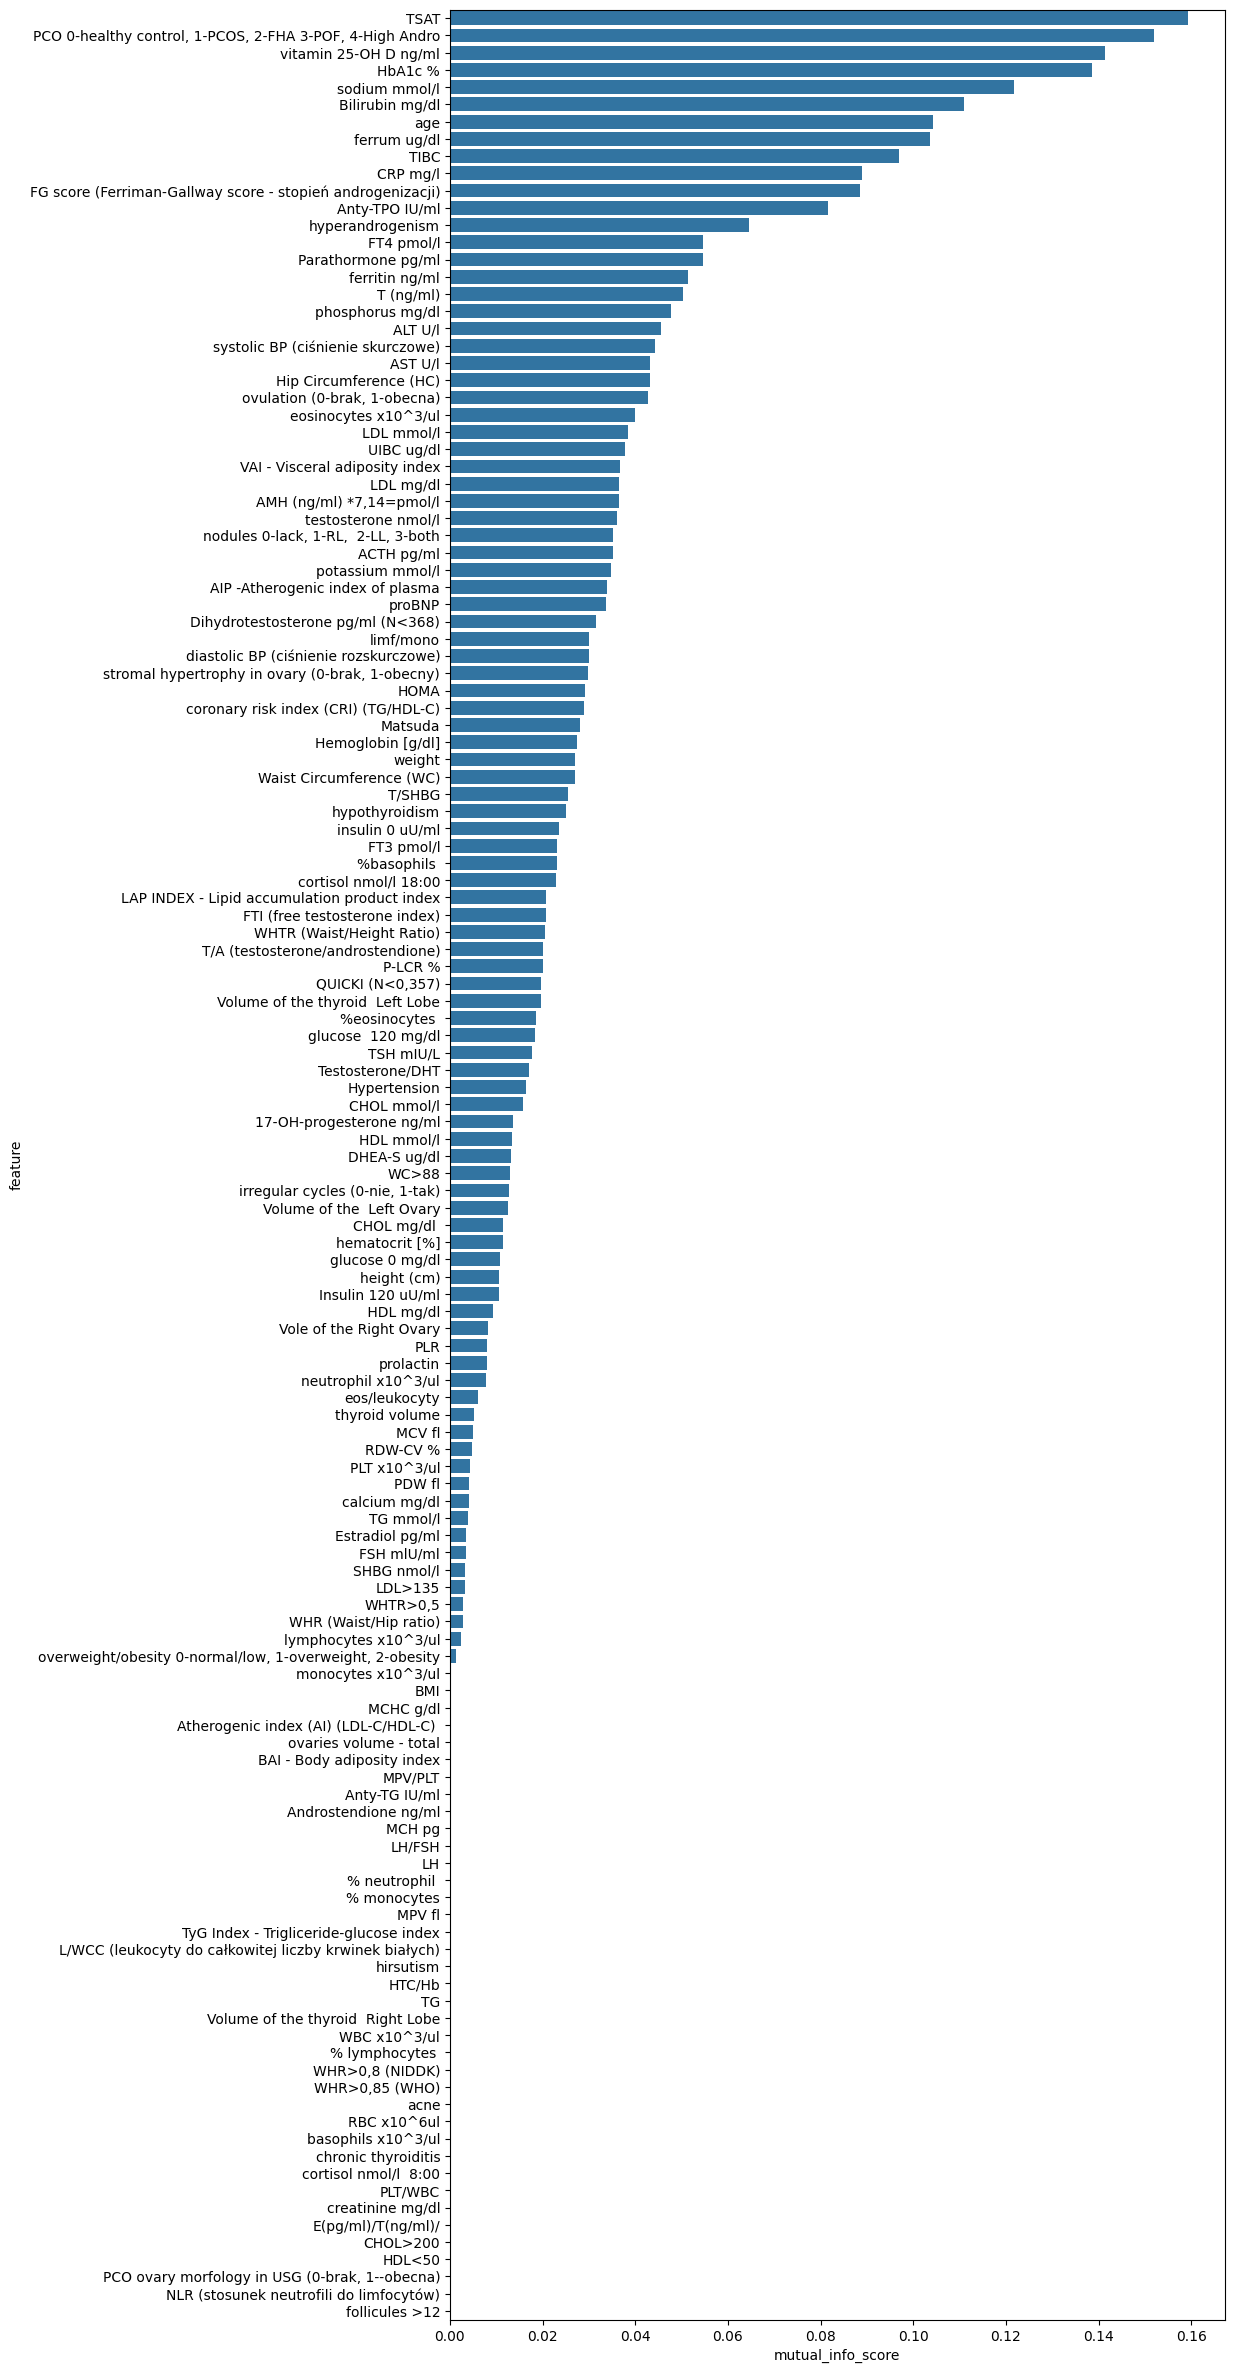

Selected 83 features


In [21]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, IGF_DISCRETE, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

Optimal number of features: 41


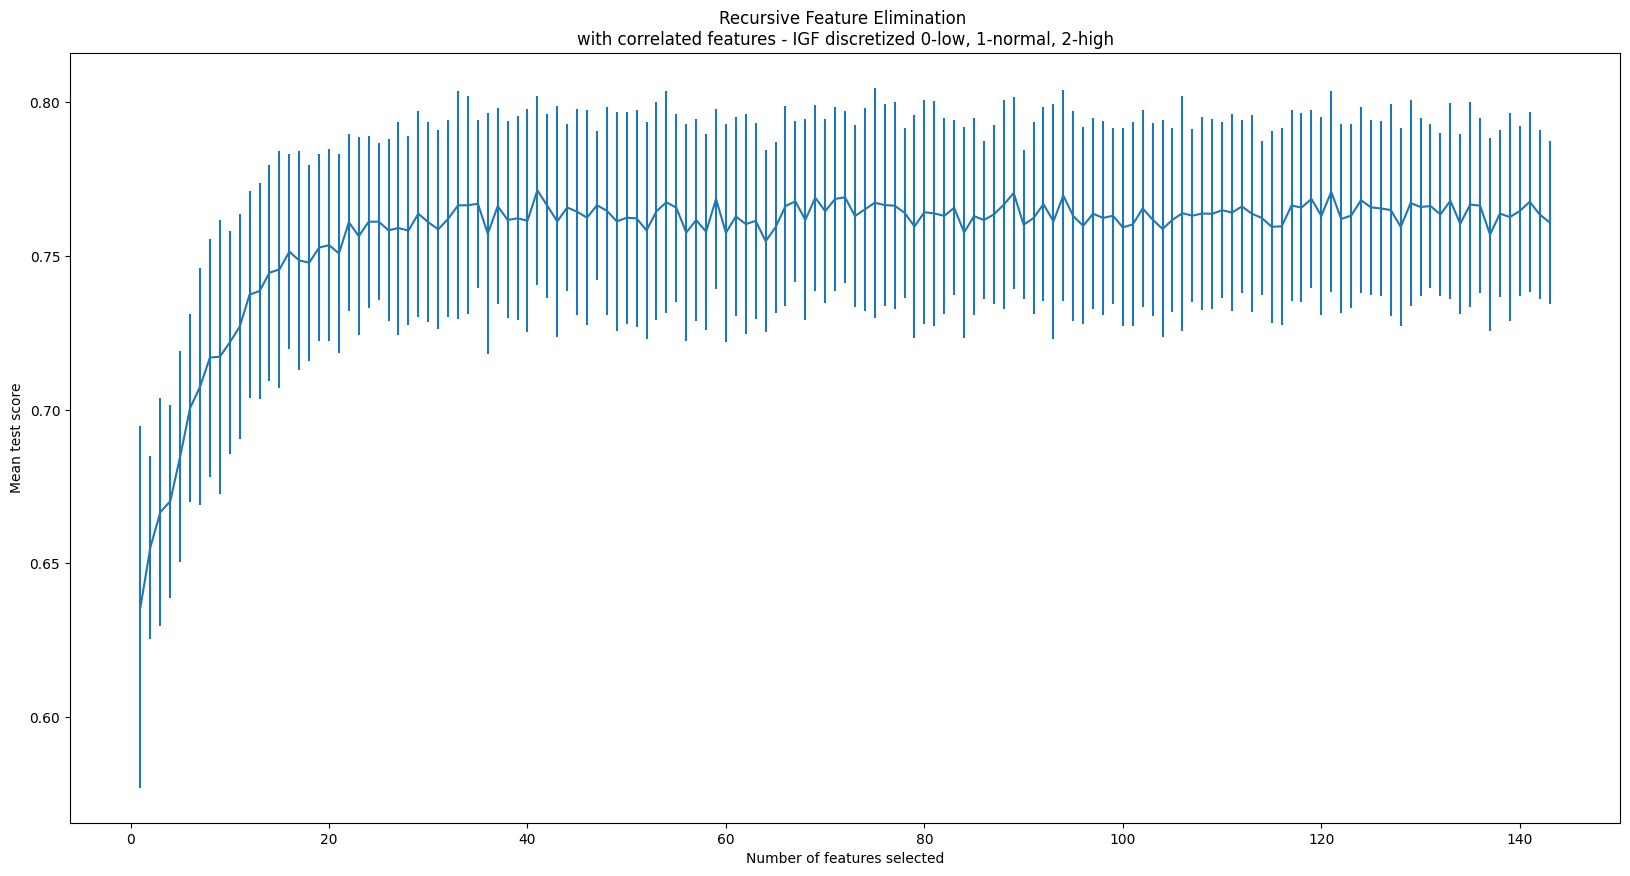

['Parathormone pg/ml',
 'E(pg/ml)/T(ng/ml)/',
 'Estradiol pg/ml',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'ferritin ng/ml',
 'QUICKI (N<0,357)',
 'cortisol nmol/l 18:00',
 'TSAT',
 'coronary risk index (CRI) (TG/HDL-C)',
 'HOMA',
 'HTC/Hb',
 'HbA1c %',
 'calcium mg/dl',
 'WHTR (Waist/Height Ratio)',
 'WHR (Waist/Hip ratio)',
 'LAP INDEX - Lipid accumulation product index',
 'Matsuda',
 'Testosterone/DHT',
 'VAI - Visceral adiposity index',
 'TyG Index - Trigliceride-glucose index',
 'UIBC ug/dl',
 'CRP mg/l',
 'Dihydrotestosterone pg/ml (N<368)',
 'MCV fl',
 'ACTH pg/ml',
 'proBNP',
 'AIP -Atherogenic index of plasma',
 'ferrum ug/dl',
 'AMH (ng/ml) *7,14=pmol/l',
 'prolactin',
 'vitamin 25-OH D ng/ml',
 'phosphorus mg/dl',
 'insulin 0 uU/ml',
 'TIBC',
 'hyperandrogenism',
 'BMI',
 'Bilirubin mg/dl',
 'glucose 0 mg/dl',
 'sodium mmol/l',
 'Anty-TPO IU/ml',
 'ovulation (0-brak, 1-obecna)']

In [22]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, IGF_DISCRETE, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

### Gini index

Selected 131 features


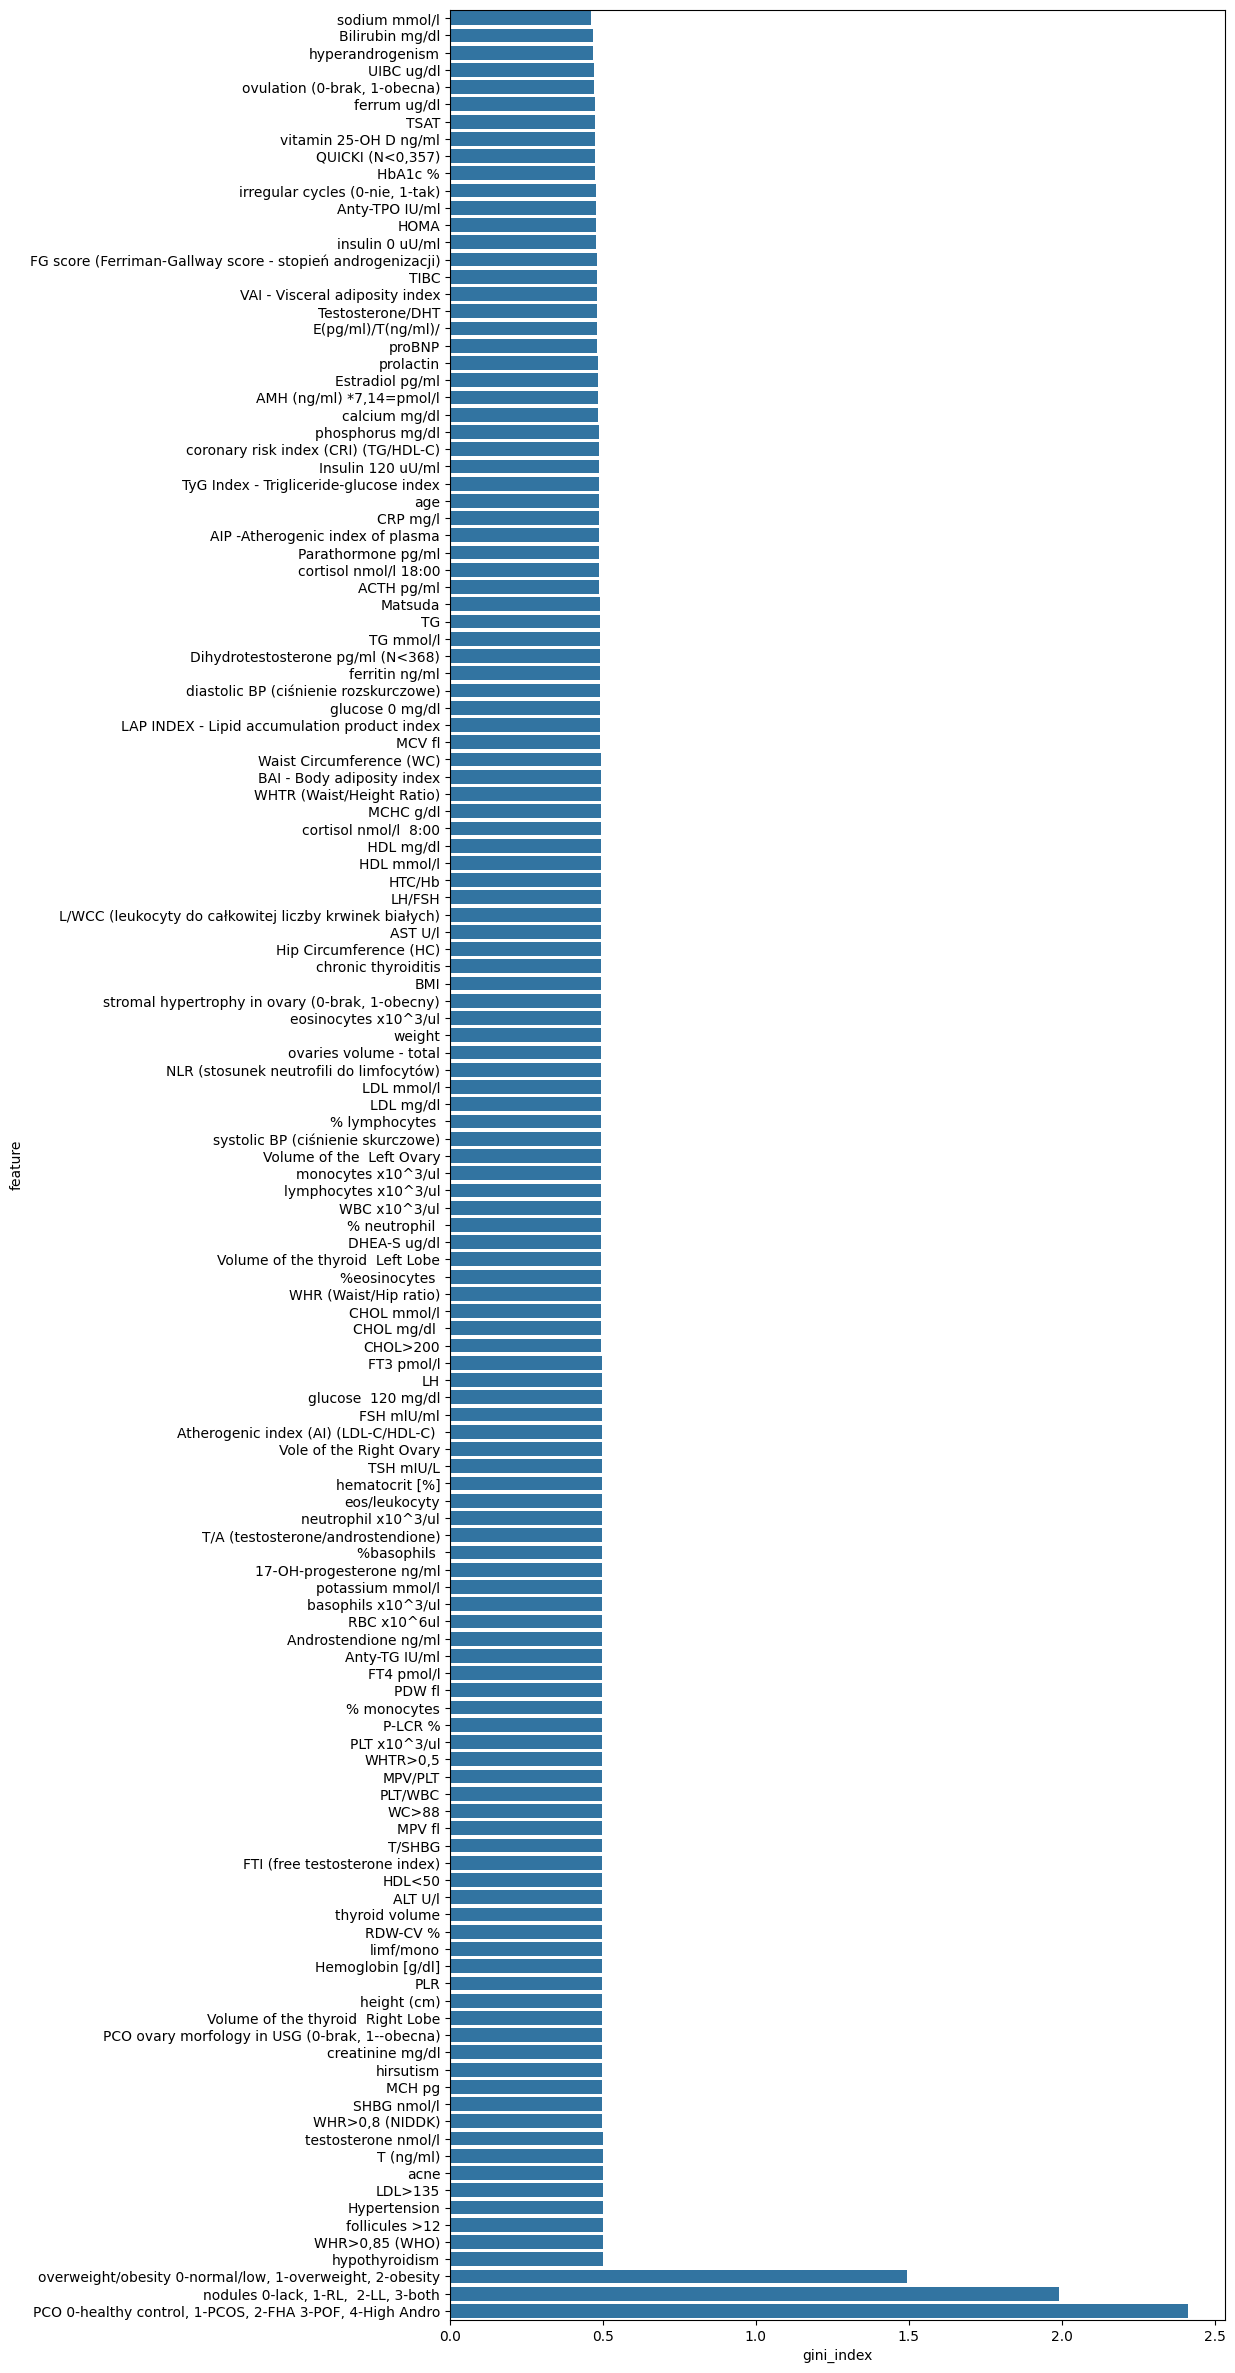

['sodium mmol/l',
 'Bilirubin mg/dl',
 'hyperandrogenism',
 'UIBC ug/dl',
 'ovulation (0-brak, 1-obecna)',
 'ferrum ug/dl',
 'TSAT',
 'vitamin 25-OH D ng/ml',
 'QUICKI (N<0,357)',
 'HbA1c %',
 'irregular cycles (0-nie, 1-tak)',
 'Anty-TPO IU/ml',
 'HOMA',
 'insulin 0 uU/ml',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'TIBC',
 'VAI - Visceral adiposity index',
 'Testosterone/DHT',
 'E(pg/ml)/T(ng/ml)/',
 'proBNP',
 'prolactin',
 'Estradiol pg/ml',
 'AMH (ng/ml) *7,14=pmol/l',
 'calcium mg/dl',
 'phosphorus mg/dl',
 'coronary risk index (CRI) (TG/HDL-C)',
 'Insulin 120 uU/ml',
 'TyG Index - Trigliceride-glucose index',
 'age',
 'CRP mg/l',
 'AIP -Atherogenic index of plasma',
 'Parathormone pg/ml',
 'cortisol nmol/l 18:00',
 'ACTH pg/ml',
 'Matsuda',
 'TG',
 'TG mmol/l',
 'Dihydrotestosterone pg/ml (N<368)',
 'ferritin ng/ml',
 'diastolic BP (ciśnienie rozskurczowe)',
 'glucose 0 mg/dl',
 'LAP INDEX - Lipid accumulation product index',
 'MCV fl',
 'Waist Circumferenc

In [23]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(IGF_DISCRETE, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

#  NOTE: we don't consider it as a constraint because it would select either one feature or all of them
# selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

### Permutation importance

selected 100 features


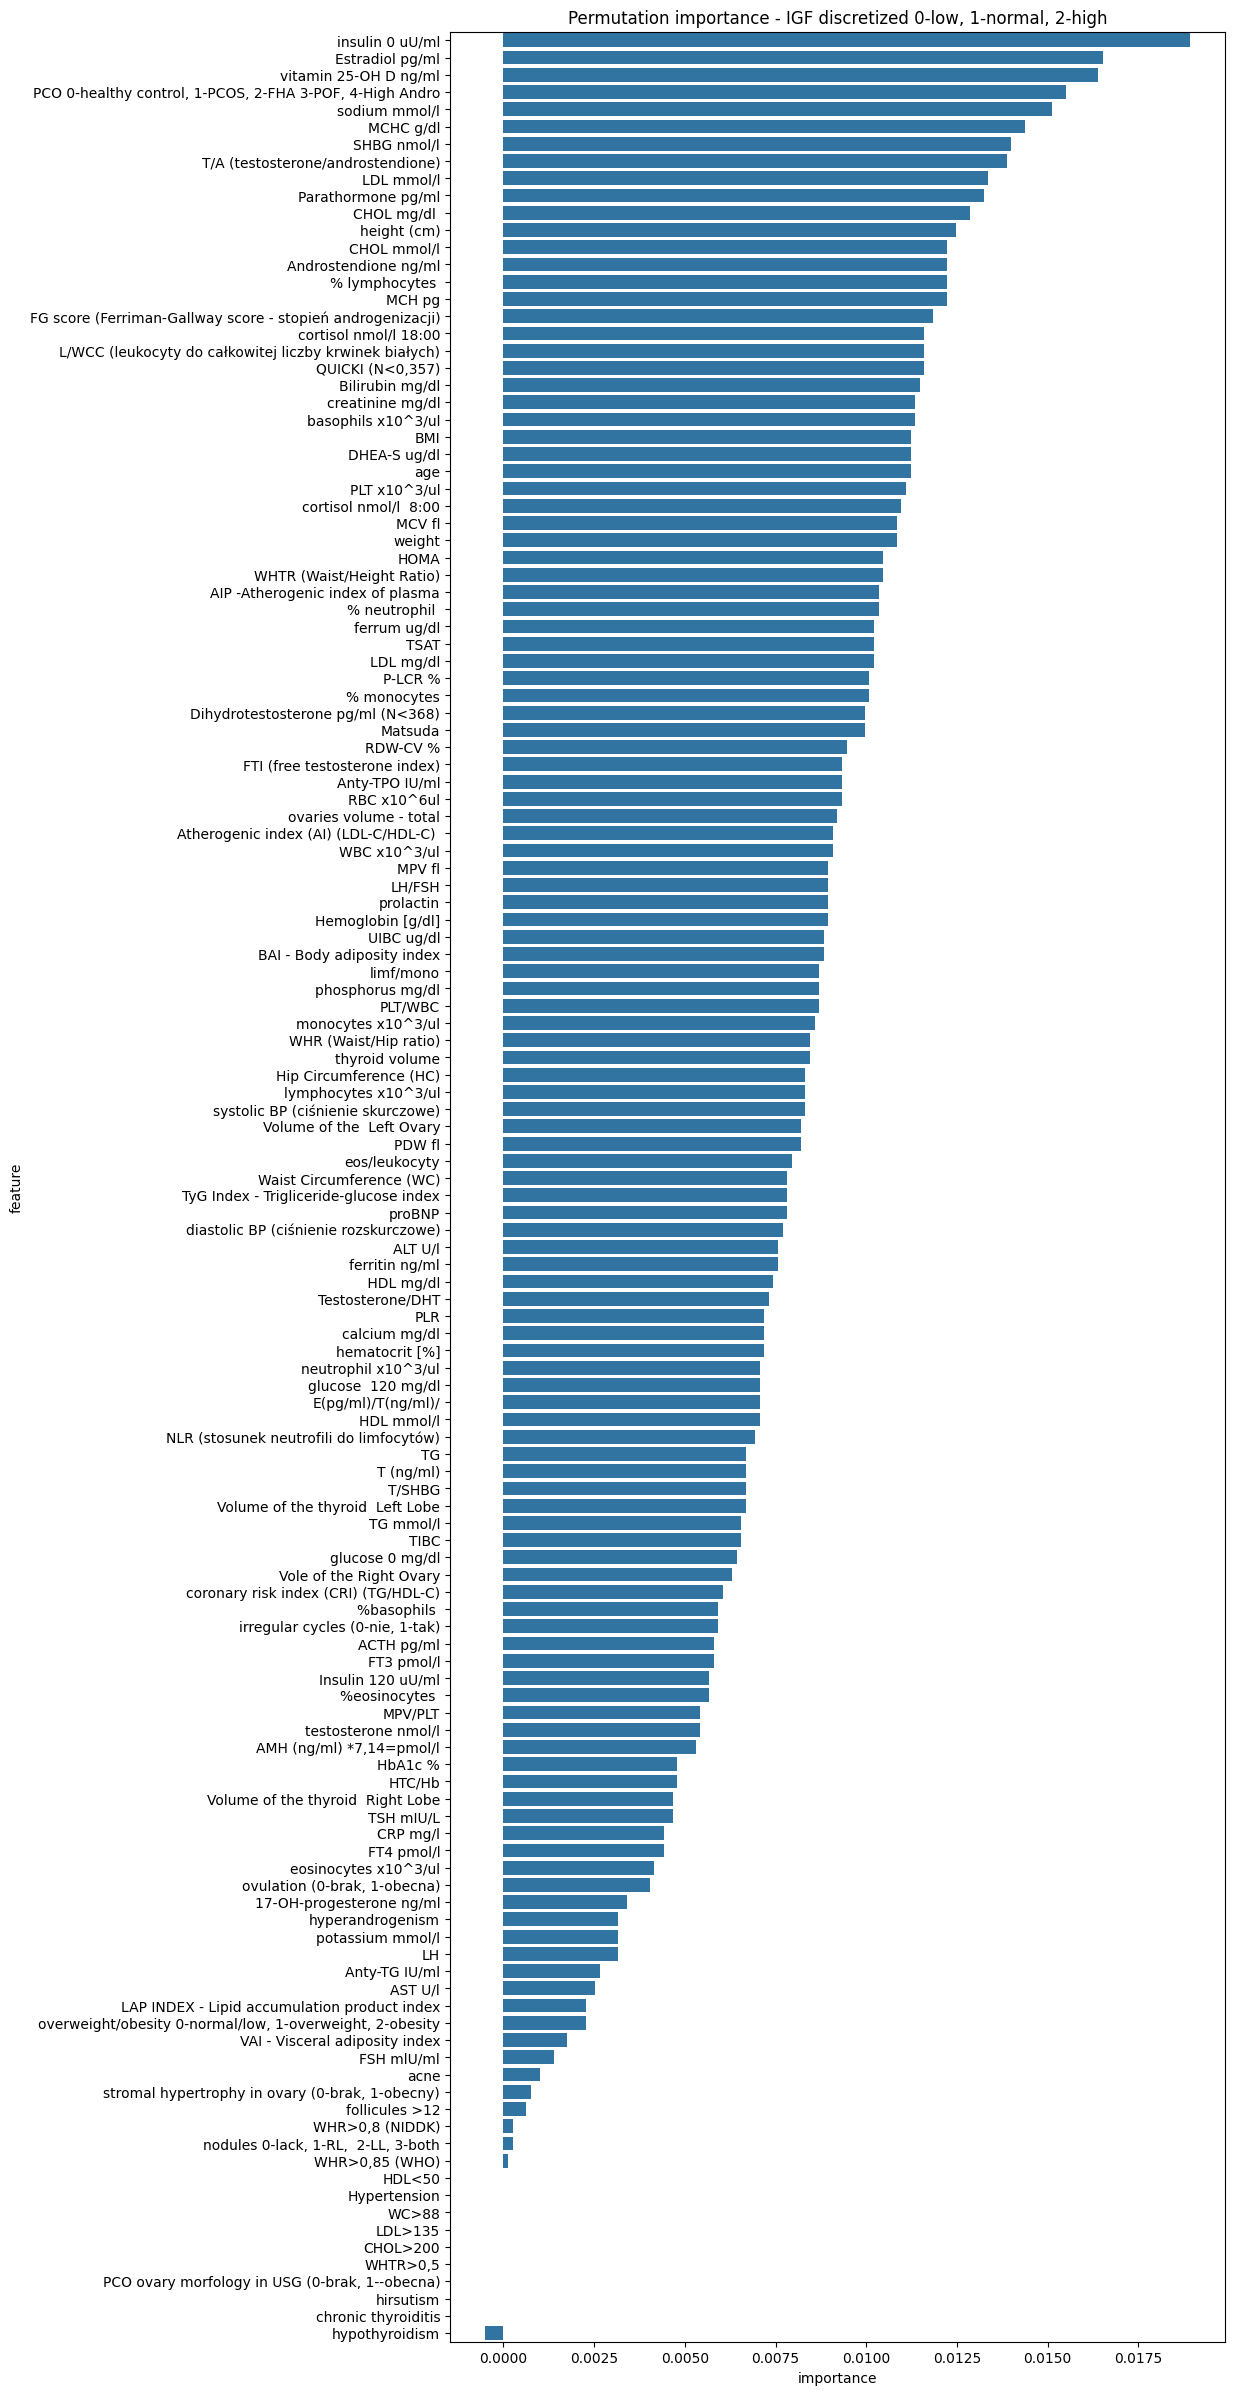

Actually selected 100 features


In [24]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, IGF_DISCRETE, threshold=0.005)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [27]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

0
[]


""


In [26]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

120
['% neutrophil ', 'MPV/PLT', 'hypothyroidism', 'FTI (free testosterone index)', 'weight', 'Volume of the thyroid  Left Lobe', 'ferrum ug/dl', 'TSAT', 'WC>88', 'HbA1c %', 'irregular cycles (0-nie, 1-tak)', 'proBNP', 'ferritin ng/ml', 'LAP INDEX - Lipid accumulation product index', 'HDL mmol/l', 'CRP mg/l', 'eosinocytes x10^3/ul', 'prolactin', 'basophils x10^3/ul', 'calcium mg/dl', 'AMH (ng/ml) *7,14=pmol/l', 'CHOL>200', 'TyG Index - Trigliceride-glucose index', 'height (cm)', 'cortisol nmol/l  8:00', 'CHOL mg/dl ', 'HTC/Hb', 'TSH mIU/L', 'Parathormone pg/ml', 'nodules 0-lack, 1-RL,  2-LL, 3-both', 'PLR', 'VAI - Visceral adiposity index', 'PLT/WBC', 'potassium mmol/l', 'UIBC ug/dl', 'vitamin 25-OH D ng/ml', 'glucose 0 mg/dl', '%basophils ', 'age', 'Hip Circumference (HC)', 'insulin 0 uU/ml', 'HOMA', 'MCHC g/dl', 'LH/FSH', 'WHR (Waist/Hip ratio)', 'stromal hypertrophy in ovary (0-brak, 1-obecny)', 'Androstendione ng/ml', 'neutrophil x10^3/ul', 'RBC x10^6ul', 'ovaries volume - total', 